In [17]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids
from sklearn.datasets import fetch_species_distributions
from sklearn.cluster import KMeans
from matplotlib import style
style.use("ggplot")



In [18]:
dt = pd.read_csv("globalterrorismd.csv", encoding ='latin1')
dt.head()

/Users/pedroazambuja/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [19]:
dt.region_txt.value_counts()

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

In [20]:
dt = dt.loc[:, ['iyear','imonth','iday','country','gname',
'country_txt',
'region_txt',
'region',
'city',
'latitude',
'longitude',
'success',
'attacktype1',
'attacktype1_txt',
'targtype1',
'targtype1_txt',
'targsubtype1',
'targsubtype1_txt',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'nkill',
 'nwound',]]
dt= dt[(dt.region_txt=="Eastern Europe")|(dt.region_txt=="Western Europe")]
dt.nkill = dt.nkill.fillna(0)
dt.nwound = dt.nwound.fillna(0)

In [21]:
dt.head()

,iyear,imonth,iday,country,gname,country_txt,region_txt,region,city,latitude,...,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,nkill,nwound
3,1970,1,0,78,Unknown,Greece,Western Europe,8,Athens,37.983773,...,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,0.0,0.0
12,1970,1,8,98,Unknown,Italy,Western Europe,8,Rome,41.890520,...,5,Firearms,4.0,Rifle/Shotgun (non-automatic),5.0,Firearms,3.0,Handgun,0.0,0.0
15,1970,1,10,499,Commune 1,East Germany (GDR),Eastern Europe,9,East Berlin,52.516667,...,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,0.0,0.0
34,1970,1,28,499,Unknown,East Germany (GDR),Eastern Europe,9,East Berlin,52.516667,...,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,NaN,NaN,NaN,NaN,0.0,0.0
59,1970,2,10,362,Popular Front for the Liberation of Palestine ...,West Germany (FRG),Western Europe,8,Munich,48.139126,...,5,Firearms,2.0,Automatic Weapon,NaN,NaN,NaN,NaN,1.0,0.0


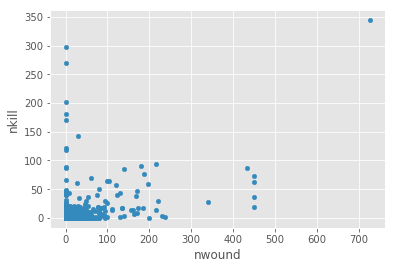

In [22]:
dt.plot.scatter('nwound','nkill')
plt.show()

Ajuste linear entre nwound nkill:
Coeficiente linear: 0.368347295741
Coeficiente angular: 0.20445710143


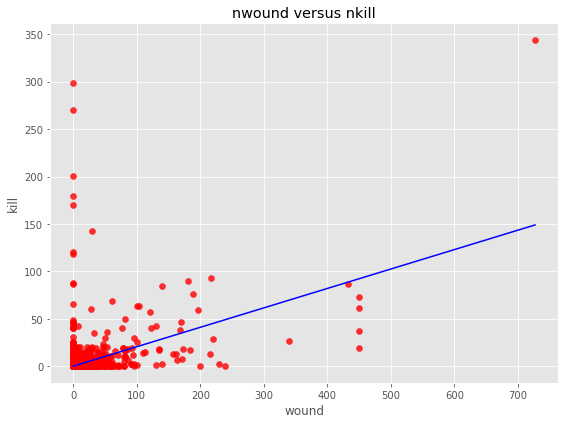

0.454097734617


In [23]:

a = dt.nwound.cov(dt.nkill) / dt.nwound.var()
b = dt.nkill.mean() - a*dt.nwound.mean()

print('Ajuste linear entre nwound nkill:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

fig = plt.figure(figsize=(8, 6))
plt.scatter(dt.nwound, dt.nkill, c='red', alpha=0.8)
plt.title('nwound versus nkill')
plt.xlabel('wound')
plt.ylabel('kill')

plt.plot((dt.nwound.min(), dt.nwound.max()), (a*dt.nwound.min()+b, a*dt.nwound.max()+b), color='blue')
#axes = plt.gca()
#axes.set_xlim([0,200])
#axes.set_ylim([0,200])
plt.tight_layout()
plt.show()
print(dt.nwound.corr(dt.nkill))

/Users/pedroazambuja/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pedroazambuja/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


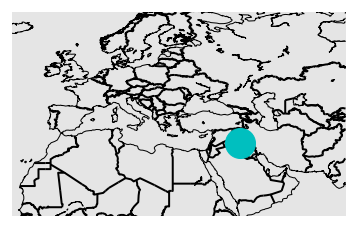

In [24]:
m = Basemap(projection="cyl",
           llcrnrlat=13.00,
           llcrnrlon=-19.66,
           urcrnrlat=69.71,
           urcrnrlon = 72.61,
           resolution='l')
#Coordenadas em latitude e longitude
coordenadas = {
    "IRAQUE" : [33.3,43.35],
    "Portugal": [38.4,9.8],
    "Espanha" : [41.23,2.9],
    "Franca" : [48.51,2.20],
    "Italia" : [43.76,11.25]
}
IRAQlat,IRAQlon = 33.3,43.55
xpt,ypt = m(IRAQlon,IRAQlat)
m.plot(xpt,ypt,'co',markersize=30)
m.drawcoastlines()
m.drawcountries(linewidth=2)
plt.show()

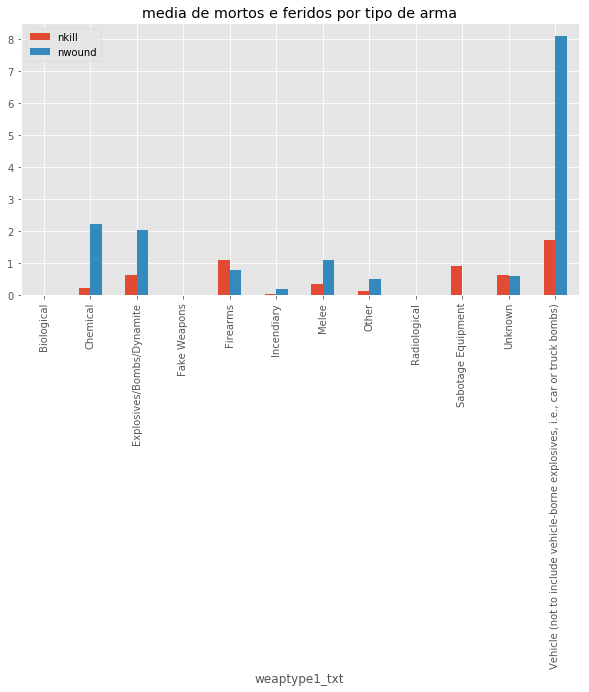

In [25]:

dt_weap = dt.loc[:,['weaptype1_txt','nkill','nwound']]
dt_weap.nkill.groupby(dt.weaptype1_txt).mean()
dt_weap2 = pd.DataFrame(dt_weap.groupby(dt.weaptype1_txt).mean())
dt_weap2.plot(kind = 'bar', figsize = (10,5))
plt.title("media de mortos e feridos por tipo de arma")
plt.show()


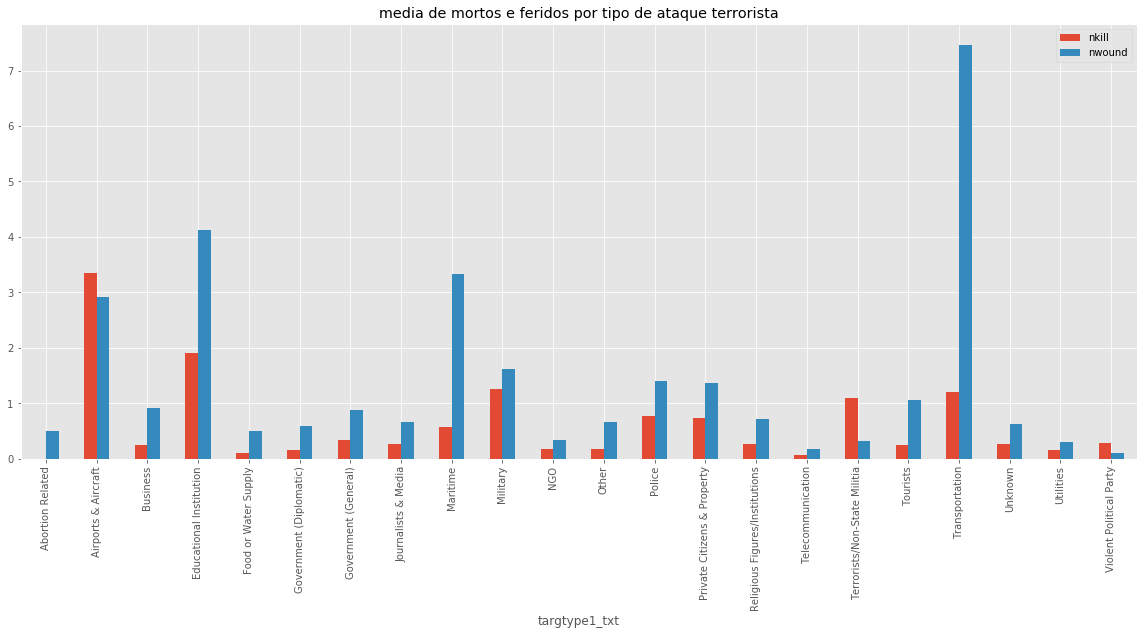

,nkill,nwound
targtype1_txt,,
Abortion Related,0.000000,0.500000
Airports & Aircraft,3.349030,2.911357
Business,0.259622,0.924984
Educational Institution,1.909483,4.120690
Food or Water Supply,0.100000,0.500000
Government (Diplomatic),0.154930,0.590269
Government (General),0.338303,0.876109
Journalists & Media,0.274074,0.656790
Maritime,0.583333,3.333333


In [26]:
dt_target = dt.loc[:,['targtype1_txt','nkill','nwound']]
dt_target2 = pd.DataFrame(dt_target.groupby(dt.targtype1_txt).mean())
dt_target2.plot(kind = 'bar', figsize= (20,8))
plt.title("media de mortos e feridos por tipo de ataque terrorista")
plt.show()
dt_target2

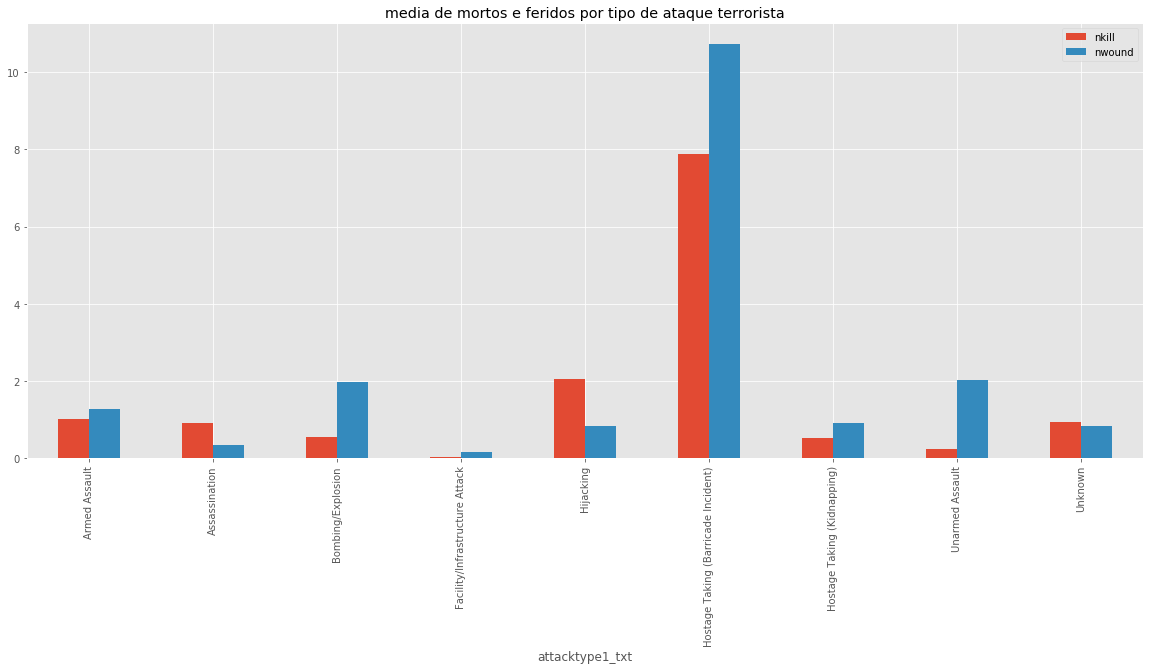

In [27]:
dt_attack = dt.loc[:,['attacktype1_txt','nkill','nwound']]
dt_attack2 = pd.DataFrame(dt_attack.groupby(dt.attacktype1_txt).mean())
dt_attack2.plot(kind = 'bar', figsize= (20,8))
plt.title("media de mortos e feridos por tipo de ataque terrorista")
plt.show()


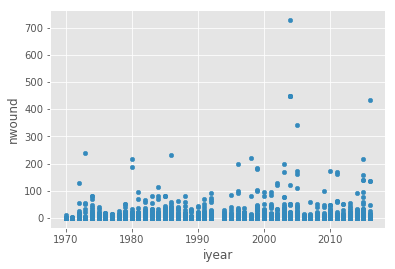

In [28]:
dt.plot.scatter('iyear','nwound')
plt.show()

3         0
12        0
15        0
34        0
59        0
62        0
79        0
80        0
97        0
103       0
120       0
171       0
240       0
241       0
258       0
275       0
277       0
288       0
290       0
324       0
325       0
349       0
350       0
360       0
364       0
365       0
366       0
367       0
368       0
403       0
         ..
169640    1
169689    0
169690    0
169721    0
169815    0
169816    0
169817    1
169832    0
169874    0
169892    0
169914    0
169925    0
169926    0
169938    0
169973    0
169984    0
169985    0
169989    1
169990    1
170089    0
170090    0
170108    1
170119    0
170177    0
170178    0
170210    0
170254    0
170255    0
170268    0
170297    0
Name: individual, dtype: int64

In [ ]:
x = []
y = []

plt.scatter(x,y)


X = np.array([])
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.","r.","c.","y."]


for i in range(len(X)):
    print("coordinate:",X[i],"label:",labels[i])
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize = 10)
    
plt.scatter(centrois[:,0],centroids[:,1],marker = "x",s = 150, linewidths = 5,zorder = 10)
plt.show()
    
    
    